<a href="https://colab.research.google.com/github/Rawan-Abdelahman/Data_Analysis_Assignments/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import Dataset

---



In [282]:
data = pd.read_csv('/content/Social_Network_Ads (Assignment 1).csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Data Preprocessing

---



In [283]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [285]:
# check null values
data.isnull().sum() # the output is zero meaning there are no missing data

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [286]:
# check for duplicated values
data.duplicated().sum() # no duplicated values are found

np.int64(0)

In [287]:
# drop ID column
data.drop('User ID',axis=1, inplace=True)

In [288]:
# import from sklean
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [289]:
leabel_encoder = LabelEncoder()
# Transform Gender into numeric values
data['Gender_numeric'] = leabel_encoder.fit_transform(data['Gender'])

data.drop('Gender',axis=1, inplace= True)
print(data['Gender_numeric'].unique())

[1 0]


In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
 3   Gender_numeric   400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [291]:
correlation = data.corr(numeric_only= True).abs()
correlation.style.background_gradient(cmap='Blues')

,Age,EstimatedSalary,Purchased,Gender_numeric
Age,1.000000,0.155238,0.622454,0.073741
EstimatedSalary,0.155238,1.000000,0.362083,0.060435
Purchased,0.622454,0.362083,1.000000,0.042469
Gender_numeric,0.073741,0.060435,0.042469,1.000000


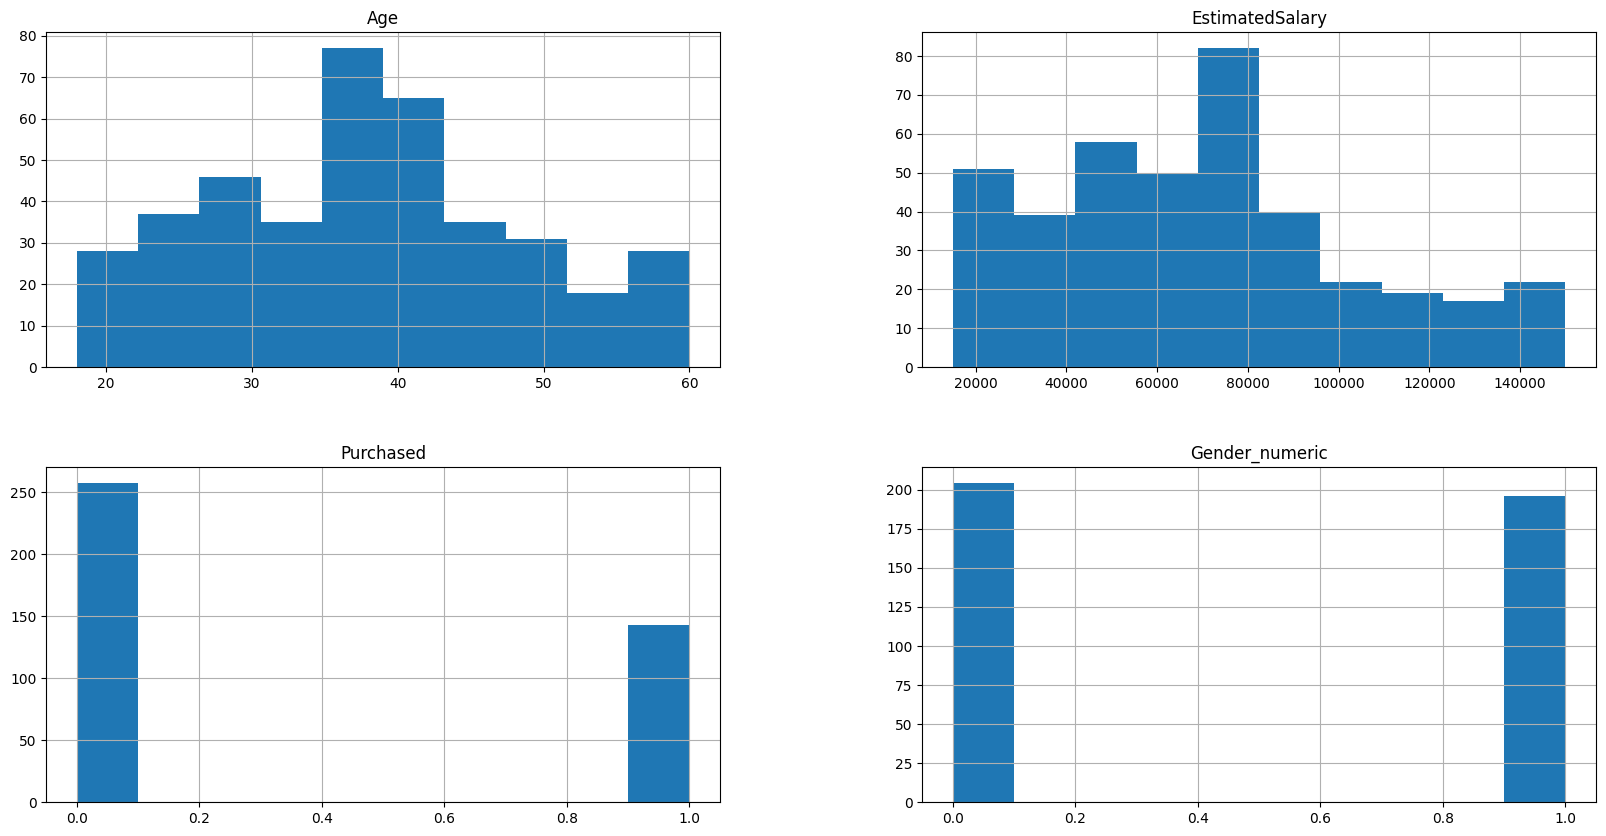

In [292]:
data.hist(figsize=(20,10))
plt.show()

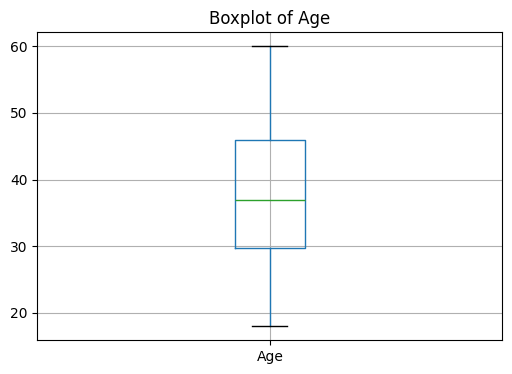

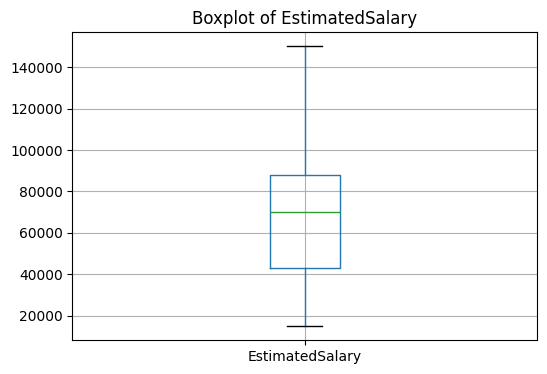

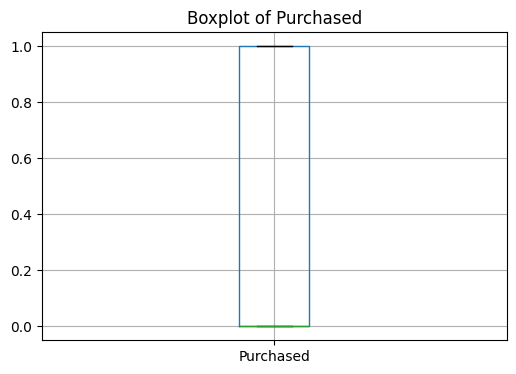

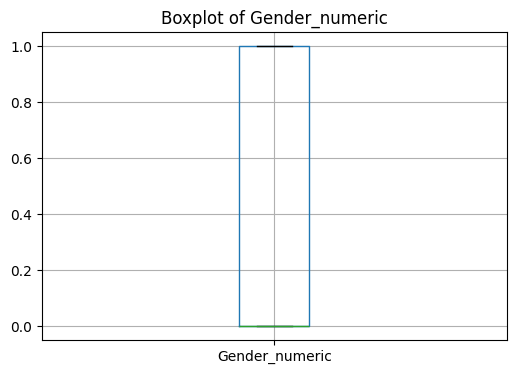

In [293]:
# check for outliers
for column in data.columns:
  plt.figure(figsize=(6,4))
  data.boxplot(column= column)
  plt.title(f"Boxplot of {column}")
  plt.show()
# based on the below figures, there is no outliears

Model Development

---



In [294]:
# Building the Model

X = data.drop('Purchased', axis= 1)
y = data['Purchased']


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Data prediction
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"The Model Accuracy is {accuracy}")

The Model Accuracy is 0.875
